# (F4023 Métodos Computacionais em Engenharia)
## Exame da época normal 
### 9 de Junho de 2023 (3h de duração)

A cotação de cada alínea aparece no início do respectivo enunciado, na escala de 100%.

In [1]:
import numpy as np
import matplotlib.pylab as plt

### Descrição do problema

Queremos considerar um universo com apenas 2 dimensões espaciais. Neste, existe um planeta que solidificou demasiado depressa para ser homogéneo. No centro, no que podemos chamar um núcleo, formou-se uma região com aproximadamente a forma de uma rosa de 3 pétalas, constituída por ferro (densidade na Terra $\rho_{Fe}=7,87 \text{kg/m}^3$). O restante planeta é constituído por silício (densidade na Terra $\rho_{Si}=2,33 \text{kg/m}^3$), formando uma espécie de manto, até à superfície. O planeta tem massa $M$ e raio $R$. 

<img src="ex_normal1.png" alt="drawing" width="250"/>

A fronteira entre núcleo e manto é descrita pela curva polar $ r = R(0.3 + 0.2\cos(3\theta))$ (a verde na figura). (A área no interior da curva é de $3\pi R^2/10 $)

Pretendemos determinar a aceleração da gravidade a uma altitude de $R/2$, nas direcções $0^o$, $90^o$ e $180^o$, e a uma profundidade de $R/5$, nas mesmas direcções.

Dados: $G=6.67\times10^{-11} \text{m}^3\text{kg}^{-1}\text{s}^{-2}$; tome $R=5000\text{km}$.

#### Perguntas

a) [20] Escreva as equações que precisa resolver, em unidades físicas. Deve usar um dos tipos de equação que estudamos na UC. Lembre-se que em 2D a lei de atração universal tem uma forma diferente de em 3D! Mas a lei de Gauss (e outras que podemos derivar daí) é igual.

De seguida escale as equações de modo a ter grandezas adimensionais, de ordem unitária.

A 2 dimensões temos através da força gravítica:

$$ g = -\frac{GM}{(x^2+y^2)} = -\frac{GM}{r^2} $$

mas a massa do planeta apresenta uma distibuição não consntate, portanto:

$$ M = \int_0^R 2\pi r \rho(r) dr$$

substituindo, vem:

$$ \vec{g} = -G 2\pi \int_0^R \frac{\rho(r)}{r} dr $$

Seja $\phi$ o potencial gravitacional, através da equação de poisson resulta:

$$ \nabla \phi = \pi G \rho(x,y) <=> \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2}  = 2\pi G \rho(x,y)$$

em que $G$ é a consntate gravtiacional e $\rho(x,y)$ é a distribuição de massa.

As unidades são:

* $[\rho\left(x,y\right)] = kg \space m^{-3}$
* $[G] = s^{-2} kg^{-1} m^{3}$
* $[\phi] = m^2 s^{-2}$

De forma a adimensionalizar esta expressão temos que fazer as seguintes mudanças de variáveis:

* $ x = Rx'$
* $ y = Ry'$
* $ \phi = a \phi'$
* $ \rho = \gamma \rho'$

que substituindo na equação original resulta:

$$ \frac{\partial^2 \phi'}{\partial x'^2} + \frac{\partial^2 \phi'}{\partial y'^2}  =  \frac{\pi G \gamma R^2}{a} \rho'(x,y)$$

As constantes que multiplicam no segundo termo resulta num valor adimensional ao qual queremos igualar a 1. Ficando:

$$ \frac{\partial^2 \phi'}{\partial x'^2} + \frac{\partial^2 \phi'}{\partial y'^2}  =  \rho'(x,y) \tag 1$$

e $$ a =  2\pi G \gamma R^2 $$

Resolvendo a equação (1) temos então a descrição do potencial gravítico $\phi$ no espaço. Para se obter a gravidade é através de:

$$ \vec g= - \nabla \phi  <=> \vec g= - \left( \frac{\partial \phi}{\partial x} + \frac{\partial \phi}{\partial y} \right)$$


As unidades são:

* $[\phi] = m^2 s^{-2}$
* $[ g ] = m \space s^{-2}$

Fazendo a mudança de variável semelhante à equação inicial mas agora com $ g = \beta g'$, vem:

$$ \vec g' = - \frac{a}{R \beta} \left( \frac{\partial \phi'}{\partial x'} + \frac{\partial \phi'}{\partial y'} \right)$$

Resultando:

$$ \vec g' = - \left( \frac{\partial \phi'}{\partial x'} + \frac{\partial \phi'}{\partial y'} \right) \tag 2$$

b) [40] Escreva um código que lhe permita obter esse valor. Use um método numérico à sua escolha (desde que apropriado!), comentando méritos e deméritos relativamente a outras hipóteses. Tenha atenção às condições fronteira a usar e comente a sua escolha, e a influência dessa escolha no resultado obtido.

Dos métodos estudados em aula o que se demonstrou mais eficiente foi um método de resolução de equações elípticas chamado de SOR - Sobrerelaxações Sucessivas. Em relação a outros métodos como o de Jacabi ou Gauss-Seidel, este apresenta melhor desempenho devido ao parâmetro de relxação que força uma evolução mais rápida da solução.

Para a distribuição de massa temos de considerar diferentes situações, uma que é regida pela curva descrita e outra pela restante parte constituinte do planeta. Se fizermos a densidade adimensional do ferro como 1, então a densiade adimensional do silício será 
$\frac{2.33}{7.87} = 0.29606$.

Porntato:
* $\rho'(x,y) = 1$ se $ r \leq R(0.3 + 0.2\cos(3\theta))$

* $\rho'(x,y) = 0.29606$ se $  R(0.3 + 0.2\cos(3\theta)) \leq r \leq R$

* $\rho'(x,y) = 0$ se $  r \geq R$

Como condições fronteira usei condições de Dirichlet nulas. Isto é possível se considerar um espaço muito superior aos pontos onde queremos estudar o que se pode revelar como problemático pois para que o tempo computacional não seja excessivo teremos uma menor resolução. Esta condição fronteira pode ser nula pois o potencial gravítico para pontos muito afastados do planeta é de esperar que tenda para 0.

Considerei assim uma grelha de estudo de $5R$ de distância de um ponto central.

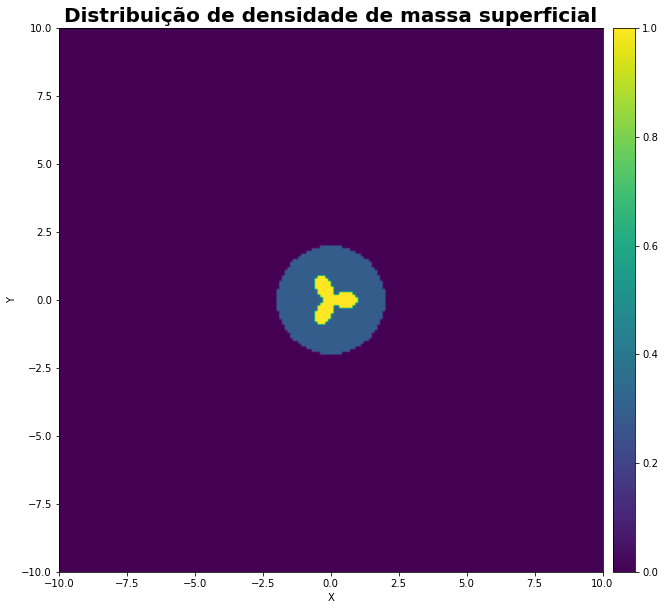

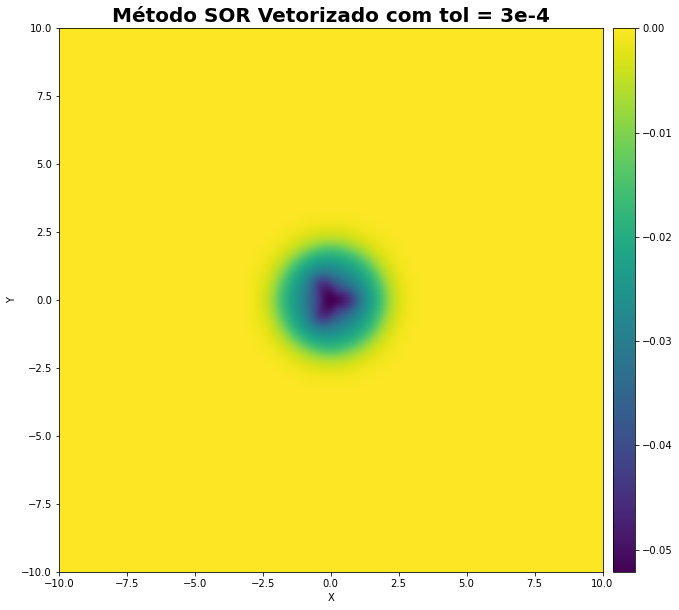

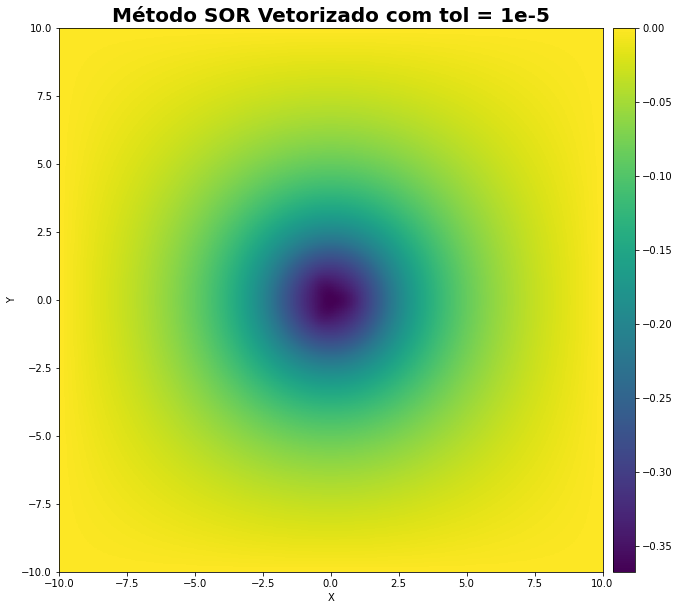

In [2]:
R = 5000e3
nx = 200
ny = 200

xmax = 5
xmin = -5
ymax = 5
ymin = -5

x = np.linspace(xmin,xmax,nx)
dx = x[1] - x[0]
y = np.linspace(ymin,ymax,ny)
dy = y[1] - y[0]

X,Y = np.meshgrid(x,y)

def rho_adim(x,y,R = 1):          # Definição da distribuição de massa adimensional (R=1)
    theta = np.arctan2(y,x)
    r = np.sqrt(x**2+y**2)
    
    if r <=  R*(0.3 + 0.2*np.cos(3*theta)):
        return 1
    elif r <= R:
        return 0.29606
    else:
        return 0
    
    
RHO = np.zeros((ny,nx))          # Obter o fator de fonte da equção
for j in range(ny):
    for i in range(nx):
        RHO[j,i] = rho_adim(x[i],y[j])
        

u = np.zeros((ny,nx))# grelha de pontos
#condições fronteira de dirichlet
u[:,0] = 0
u[:,-1] = 0
u[0,:] = 0
u[:,-1] = 0
w = 1.6

def PDE_GS(u, f, dx, dy, tol):        # u - matrix com condições iniciais, tol - erro maximo, f - matriz de fonte",
    w = 1.6
    nx = len(u[0])
    ny = len(u[:,0])
    error = 1
    c = 0
    uold = u.copy()
    unew = u.copy()
    
    while error >= tol:
        
        unew[1:-1,1:-1] = ((u[1:-1,2:] + u[1:-1,:-2])*dy**2 + (u[2:,1:-1] + u[:-2,1:-1])*dx**2 - f[1:-1,1:-1]*dx**2*dy**2)\
                       /(2*(dx**2+dy**2)) 
        
        u[1:-1,1:-1] = w * unew[1:-1,1:-1] + (1-w) * uold[1:-1,1:-1]
        
        
        error   = np.max(np.max(np.abs(unew-uold)))
        #print(error)
    
        c += 1
        uold = unew.copy()
        u = unew.copy()
        
        if 3e-4 <= error < 3.1e-4:
            storage.append(u)
        
    return u,c


        
storage = []

fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Distribuição de densidade de massa superficial',fontweight="bold", size=20)
c = ax.imshow(RHO, origin = "lower",extent=[-10,10,-10,10])
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(c,cax=cax)
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()

fig, ax = plt.subplots(figsize=(15,10))
matrix = PDE_GS(u,RHO,dx,dy,1e-5)[0]
ax.set_title('Método SOR Vetorizado com tol = 3e-4',fontweight="bold", size=20)
c = ax.imshow(storage[-1], origin = "lower",extent=[-10,10,-10,10])
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(c,cax=cax)
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()

fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Método SOR Vetorizado com tol = 1e-5',fontweight="bold", size=20)
c = ax.imshow(matrix, origin = "lower",extent=[-10,10,-10,10])
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(c,cax=cax)
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()

c) [15] Determine a grandeza pretendida, $\vec{g}$, nos diferentes pontos pedidos.

Para determinar $\vec g$ nos diferentes pontos do pedidos, tendo o resultado do da alínea anterior, podemos recorrer a diferenças finitas e obter a aceleração gravítica nesses pontos. Pretendemos determinar a aceleração da gravidade a uma altitude de $R/2$, nas direcções $0^o$, $90^o$ e $180^o$, e a uma profundidade de $R/5$, nas mesmas direcções. Para as dimensões utilizadas, 20 pontos da grelha correspondem a 1 Raio.

$$\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2 u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}= g_{i,j}^n$$

As gravidades adimensionais devem ser convertidas em dimensonais com:

$$g' \times 2\pi G \gamma R$$

O parâmetro $\gamma$ depende do ponto onde estamos. 

Para pontos em R/2 acima da superficie temos:

$$\gamma = \frac{(\pi R^2 - \frac{3\pi R^2}{10})\rho_{Si} + \rho_{Fe}\frac{3\pi R^2}{10} }{\pi R^2}$$

para pontos a uma profundidade de R/5 vem:

$$\gamma = \frac{(\pi (\frac{4R}{5})^2 - \frac{3\pi R^2}{10})\rho_{Si} + \rho_{Fe}\frac{3\pi R^2}{10} }{\pi (\frac{4R}{5})^2} $$

Se a distirbuição de massa fosse dada por um círculo preenchido então seria de esperar observar acelerações gravíticas iguais para os vários ângulos para cada distância. Contudo a nossa distribuição de massa não é vista como igual para variações angulares de um ponto em relação ao centro do planeta, portanto como seria de esperar, observam-se acelerações diferentes.

In [3]:
u = matrix
R = 5000e3
G = 6.67e-11
psi = 2.33
pfe = 7.87

def g123(j,i,dx,dy):
    R = 5000e3
    G = 6.67e-11
    psi = 2.33
    pfe = 7.87
    gamma = ( (np.pi * R**2 - 3*np.pi*R**2/10 )* psi + pfe * 3*np.pi*R**2/10 )/(np.pi*R**2)
    const = 2*np.pi*G*R*gamma 
    return ((u[j,i+1] - 2*u[j,i] + u[j,i-1])/dx**2 + (u[j+1,i]-2*u[j,i] + u[j-1,i])/dy**2) * const

# Para R/2 direção 0ª (altitude)
j = 99 # y = 0
i = 99 + 20 + 10 # x = R + R/2 
g1 = g123(j,i,dx,dy)
print("g para R/2 na direção 0º: ",g1)

# Para R/2 direção 90ª (altitude)
i = 99 # x = 0
j = 99 + 20 + 10 # y = R + R/2 (altitude)
g2 = g123(j,i,dx,dy)
print("g para R/2 na direção 90º: ",g2)

# Para R/2 direção 180ª (altitude)
j = 99 # y = 0
i = 99 - 20 - 10 # x = R + R/2 
g3 = g123(j,i,dx,dy)
print("g para R/2 na direção 180º: ",g3)

########################################################

def g456(j,i,dx,dy):
    R = 4*5000e3/5
    G = 6.67e-11
    psi = 2.33
    pfe = 7.87
    gamma = ( (np.pi * R**2 - 3*np.pi*R**2/10 )* psi + pfe * 3*np.pi*R**2/10 )/(np.pi*R**2)
    const = 2*np.pi*G*R*gamma 
    
    return ((u[j,i+1] - 2*u[j,i] + u[j,i-1])/dx**2 + (u[j+1,i]-2*u[j,i] + u[j-1,i])/dy**2)*const

# Para R/5 direção 0ª (profundiade)
j = 99 # y = 0
i = 99 + 20 - 2 # x = R - R/5 
g4 = g456(j,i,dx,dy)
print("g para R/5 na direção 0º: ",g4)

# Para R/2 direção 90ª (profundiade)
i = 99 # y = 0
j = 99 + 20 - 2 # x = R - R/5 
g5 = g456(j,i,dx,dy)
print("g para R/5 na direção 90º: ",g5)

# Para R/2 direção 180ª (profundiade)
j = 99 # y = 0
i = 99 - 20 + 2 # x = R - R/5 
g6 = g456(j,i,dx,dy)
print("g para R/5 na direção 180º: ",g6)


g para R/2 na direção 0º:  -0.00011726757654758951
g para R/2 na direção 90º:  -0.00011723589879113425
g para R/2 na direção 180º:  -0.0001162534262514241
g para R/5 na direção 0º:  0.0018796200792718417
g para R/5 na direção 90º:  0.001879636919327951
g para R/5 na direção 180º:  0.001880127188663037


d) [15] Indique alterações que pode fazer para melhorar o resultado numérico, justificando. 

Uma forma de melhorar o resultado numérico seria utilizar o resultado analítico para distribuições esféricas da massa como o início da grelha de pontos, em vez de começar com espaço de potencial 0 em todos os pontos. Por exemplo, sabendo que o potencial decai com $r$, vem:

$$ \phi_{init} = -\frac{1}{\sqrt{x'^2+y'^2}}$$

e) [10] Se pretendermos uma aproximação melhor, podemos usar a discretização do laplaciano com uma fórmula de 9 pontos em vez de 5. Uma possibilidade é:
$$\nabla^2u\approx \frac{-20u_{i,j} + 4u_{i+1,j} + 4u_{i-1,j} + 4u_{i,j+1} + 4u_{i,j-1} + u_{i+1,j+1} + u_{i−1,j-1} + u_{i+1,j-1} + u_{i-1,j+1}}{6h^2},$$

que dá uma precisão $\mathcal{O}(h^4)$.
No caso de usar um método de diferenças finitas, como se altera a matriz dos coeficientes? Escreva o comando para produzir os elementos apropriados usando o comando _spdiags_.

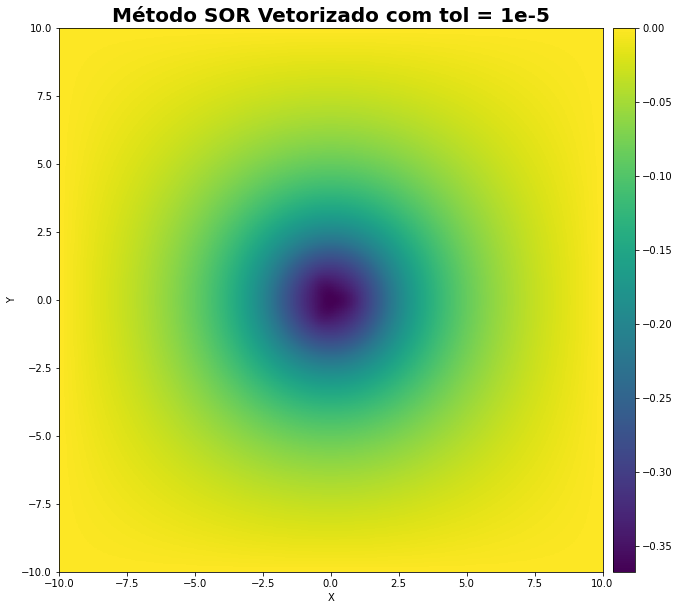

In [4]:
u = np.zeros((ny,nx))# grelha de pontos
#condições fronteira de dirichlet
u[:,0] = 0
u[:,-1] = 0
u[0,:] = 0
u[:,-1] = 0
h = dx

def PDE_GS_NEW(u, f, dx, dy, tol):        # u - matrix com condições iniciais, tol - erro maximo, f - matriz de fonte",
    w = 1.6
    nx = len(u[0])
    ny = len(u[:,0])
    error = 1
    c = 0
    uold = u.copy()
    unew = u.copy()
    
    while error >= tol:
        
        unew[1:-1,1:-1] = (4*(u[2:,1:-1] +u[1:-1,2:] + u[1:-1,:-2] + u[:-2,1:-1]) + u[2:,2:] + u[:-1,:-1] +u[2:,:-1] + u[:-1,2:])/20 \
                           - f[1:-1,1:-1]*6*h**2/20
        
        u[1:-1,1:-1] = w * unew[1:-1,1:-1] + (1-w) * uold[1:-1,1:-1]
        
        
        error   = np.max(np.max(np.abs(unew-uold)))
        #print(error)
    
        c += 1
        uold = unew.copy()
        u = unew.copy()
        
    return u,c


fig, ax = plt.subplots(figsize=(15,10))
matrix = PDE_GS(u,RHO,dx,dy,1e-5)[0]
ax.set_title('Método SOR Vetorizado com tol = 1e-5',fontweight="bold", size=20)
c = ax.imshow(matrix, origin = "lower",extent=[-10,10,-10,10])
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(c,cax=cax)
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()